In [1]:
!pip install robin_stocks
import robin_stocks.robinhood as r
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt

Library: [robin_stocks](https://readthedocs.org/projects/robin-stocks/downloads/pdf/latest/)

## Authentication and Login

In [2]:
login = r.login('kgraghav@mtu.edu','0214@Kgraghavan',store_session=True)

## List of Cryptocurrencies available

In [3]:
crypto_info=r.crypto.get_crypto_currency_pairs()
crypto_list=[]
for i in range(len(crypto_info)):
    crypto_list.append(crypto_info[i]['asset_currency']['code'])

## Read in Portfolio

In [4]:
df_portfolio=pd.read_csv('portfolio.csv')
df_portfolio.set_index('Parameters',inplace=True)
columns_list=df_portfolio.columns.tolist()
columns_dict={}
for stock in columns_list:
    stock_str_rep=stock.replace('-','.')
    columns_dict[stock]=stock_str_rep
df_portfolio.rename(columns=columns_dict,inplace=True)
df_portfolio.sort_values(by='weight',axis=1,ascending=False)

,DOGE.USD,GSAT,HGSH,VXRT,MVIS,GLDG,KOSS,MARA,UONE,WKHS,...,INO,GOOGL,IEHS,H,AAPL,HRB,DMLRY,KSS,SLV,CLX
Parameters,,,,,,,,,,,,,,,,,,,,,
lingain,13687.570131,322.608043,199.699996,951.448206,2165.463148,180.525506,1332.426476,2142.490122,408.367352,1385.593087,...,247.135547,189.843537,81.707297,10.420994,322.342847,4.842011,136.318181,16.942446,99.397706,34.004637
score,1.539623,1.502087,1.218224,1.221155,1.425121,2.665579,1.444955,1.321912,1.494672,2.967890,...,4.480306,1.127063,1.062733,26.526102,1.022186,206.990381,1.441481,30.400430,1.301353,3.708893
price_bound,0.187068,0.843748,0.665267,3.910195,9.556530,1.160191,12.781262,22.436996,4.460050,18.450845,...,11.588208,555.515508,3.953218,27.431645,15.649760,10.723850,6.696680,36.890271,5.519195,57.305026
returns_ratio,73169.030448,382.350985,300.180386,243.324984,226.595140,155.599788,104.248427,95.489169,91.561169,75.096456,...,21.326468,0.341743,20.668555,0.379889,20.597303,0.451518,20.356083,0.459266,18.009456,0.593397
weight,0.044848,0.043499,0.042167,0.040852,0.039554,0.038274,0.037010,0.035764,0.034535,0.033323,...,0.010190,0.010103,0.009390,0.009305,0.008608,0.008524,0.007843,0.007761,0.007094,0.007015
suggested_investment,364.000000,609.030845,590.379541,571.968731,553.798415,535.868594,518.179267,500.730434,483.522096,466.554252,...,142.670266,141.448706,131.474286,130.278716,120.518799,119.349220,109.803807,108.660219,99.329309,98.211712


In [5]:
port_stocks=df_portfolio.columns.tolist()

Total suggested equity value is: 13737.07735615393


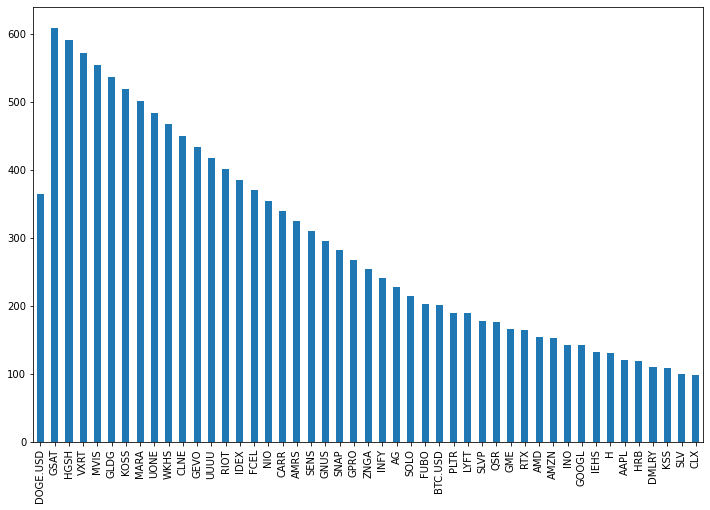

In [6]:
df_suggested_equity=df_portfolio.loc['suggested_investment',:]
df_suggested_equity.transpose().plot(kind='bar',figsize=(12,8));
total_port_equity=df_suggested_equity.sum()
print('Total suggested equity value is: {}'.format(total_port_equity))


## Print total stocks value

In [7]:
stocks_dict=r.account.build_holdings()
#print('Stocks are: {}'.format(stocks_dict))
tickers=stocks_dict.keys()
ticker_list=list(tickers)
for ticker in ticker_list:
    ticker.replace('-','.')
print(ticker_list)
###### Get crypto positions #####
crypto_holdings=r.get_crypto_positions()
print(float(crypto_holdings[3]['quantity']))

['AM', 'UONE', 'WKHS', 'IDEX', 'VXRT', 'ZNGA', 'GNUS', 'NVDA', 'SOLO', 'INO', 'NIO', 'AMD', 'AAPL', 'MVIS', 'TTM', 'F', 'MRNA', 'GLDG', 'GPRO', 'SNAP', 'INDF', 'PAAS', 'SPCE', 'TSM', 'BB', 'GME', 'CPRX', 'PLTR', 'NOK', 'GEVO', 'GSAT', 'ARKQ', 'UUUU', 'XHB', 'VEGI', 'OTIS', 'CARR', 'FCEL', 'SENS', 'XPEV', 'KOSS', 'DKS', 'GGE', 'XLK', 'CLNE', 'SLVP', 'IEHS', 'VWAGY', 'AMRS', 'DMLRY', 'RIOT', 'MARA', 'SLV', 'AG', 'INFY', 'FUBO', 'BETZ']
0.0


In [8]:
price_list=[float(stocks_dict[ticker]['equity']) for ticker in ticker_list]
for i in range(len(crypto_holdings)):
    if float(crypto_holdings[i]['quantity'])>0:
        crypto_ticker=crypto_holdings[i]['currency']['code'].replace('-USD','')
        crypto_qty=float(crypto_holdings[i]['quantity'])
        crypto_mark_price=float(r.get_crypto_quote(symbol=crypto_ticker,info='mark_price'))
        crypto_price=crypto_qty*crypto_mark_price
        price_list.append(crypto_price)
        ticker_list.append('{}.USD'.format(crypto_holdings[i]['currency']['code']))

In [9]:
######## Equity of stocks #################
df_allstock_equity=pd.DataFrame(index=['Price'],columns=ticker_list);
df_allstock_equity.loc['Price',:]=price_list;
allstock_equity_cols=df_allstock_equity.columns.tolist()
df_allstock_equity

,AM,UONE,WKHS,IDEX,VXRT,ZNGA,GNUS,NVDA,SOLO,INO,...,AMRS,DMLRY,RIOT,MARA,SLV,AG,INFY,FUBO,BETZ,DOGE.USD
Price,224.98,413.06,363.69,272.54,353.27,253.64,262.74,139.83,222.03,204.84,...,253.29,221.26,296.88,292.92,197.31,289.17,300.52,165.48,179.78,397.807767


## Stocks common to portfolio and investment

In [10]:
comm_stocks=list(set(port_stocks).intersection(set(ticker_list)))
print('Stocks common to recommended and actual portfolio: ',comm_stocks)
port_stocks=[stock.replace('-','.') for stock in port_stocks]

Stocks common to recommended and actual portfolio:  ['MARA', 'GPRO', 'FCEL', 'UONE', 'SENS', 'AMRS', 'GNUS', 'DMLRY', 'VXRT', 'MVIS', 'UUUU', 'IDEX', 'GME', 'GLDG', 'ZNGA', 'AG', 'SLVP', 'PLTR', 'WKHS', 'INO', 'SNAP', 'NIO', 'CARR', 'FUBO', 'RIOT', 'AAPL', 'INFY', 'AMD', 'SLV', 'SOLO', 'GSAT', 'IEHS', 'GEVO', 'CLNE', 'DOGE.USD', 'KOSS']


## Stocks not common

### Stock in recommended portfolio but not in actual portfolio

In [11]:
not_in_ticker_list=[stock for stock in port_stocks if stock not in ticker_list]
not_in_ticker_list

['HGSH',
 'BTC.USD',
 'LYFT',
 'QSR',
 'RTX',
 'AMZN',
 'GOOGL',
 'H',
 'HRB',
 'KSS',
 'CLX']

### Stock in  actual portfolio but not in recommended portfolio

In [12]:
not_in_port_stocks=[ticker for ticker in ticker_list if ticker not in port_stocks]
not_in_port_stocks

['AM',
 'NVDA',
 'TTM',
 'F',
 'MRNA',
 'INDF',
 'PAAS',
 'SPCE',
 'TSM',
 'BB',
 'CPRX',
 'NOK',
 'ARKQ',
 'XHB',
 'VEGI',
 'OTIS',
 'XPEV',
 'DKS',
 'GGE',
 'XLK',
 'VWAGY',
 'BETZ']

## Share Price

In [13]:
share_price={}
share_price_values=[float(stocks_dict[ticker]['price']) for ticker in tickers]
for i in range(len(tickers)):
    ticker=ticker_list[i]
    share_price[ticker]=share_price_values[i]
share_price=pd.DataFrame(share_price,index=['price'])
share_price

,AM,UONE,WKHS,IDEX,VXRT,ZNGA,GNUS,NVDA,SOLO,INO,...,VWAGY,AMRS,DMLRY,RIOT,MARA,SLV,AG,INFY,FUBO,BETZ
price,10.9,7.02,3.96,0.9244,4.77,9.02,0.87,230.55,1.96,3.32,...,23.34,4.45,17.02,16.66,22.55,22.89,13.5,23.7,5.87,18.63


## Share Quantity

In [14]:
share_quantity={}
share_quantities=[float(stocks_dict[ticker]['quantity']) for ticker in tickers]
for i in range(len(tickers)):
    ticker=ticker_list[i]
    share_quantity[ticker]=share_quantities[i]
share_quantity=pd.DataFrame(share_quantity,index=['quantity'])
share_quantity

,AM,UONE,WKHS,IDEX,VXRT,ZNGA,GNUS,NVDA,SOLO,INO,...,VWAGY,AMRS,DMLRY,RIOT,MARA,SLV,AG,INFY,FUBO,BETZ
quantity,20.64,58.84,91.84,294.83,74.06,28.12,302.0,0.6065,113.28,61.7,...,8.0,56.92,13.0,17.82,12.99,8.62,21.42,12.68,28.19,9.65


## Total Equity

Total Stocks equity value is: 14172.917766739001
Total Common Stocks equity value is: 10462.587766739001


,UONE,GEVO,DOGE.USD,UUUU,GSAT,WKHS,VXRT,GME,MVIS,KOSS,...,BB,OTIS,TSM,VEGI,NVDA,SPCE,ARKQ,XPEV,DKS,XHB
Equity,413.06,409.53,397.807767,382.58,377.35,363.69,353.27,330.96,330.6,330.4,...,154.06,152.94,148.06,141.14,139.83,138.49,132.87,118.4,115.53,103.56


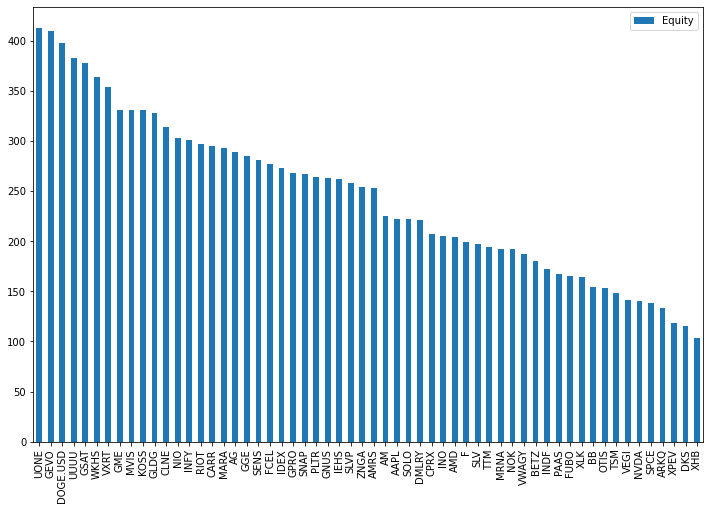

In [15]:
equity={}
total_equity=0
for i in range(len(ticker_list)):
    ticker=ticker_list[i]
    equity[ticker]=price_list[i]
    total_equity=total_equity+equity[ticker]
print('Total Stocks equity value is: {}'.format(total_equity))

equity_comm={}
total_comm_equity=df_allstock_equity.loc['Price',comm_stocks].sum()
print('Total Common Stocks equity value is: {}'.format(total_comm_equity))

df_equity=pd.DataFrame.from_dict(data=equity,orient='index',columns=['Equity'])
df_plot=df_equity.sort_values(by='Equity',axis=0,ascending=False)
if df_plot.shape[0]>0:
    df_plot.plot(kind='bar',figsize=(12,8))
else:
    print('no data to plot')
df_equity=df_equity.transpose()
df_equity.sort_values(by='Equity',axis=1,ascending=False)

## Equity Change

Total Common equity change value is: 209.22221273899996
Total Common Change Percent is: 1.5230474963094873
                         UONE     GEVO        GME       UUUU         AG  \
Equity_Comm_Change  100.64582  84.6491  61.634784  52.939008  37.060884   

                     DOGE.USD      PLTR       WKHS     GSAT      INO  ...  \
Equity_Comm_Change  33.807767  24.31485  21.132384  17.5512  17.5228  ...   

                        GPRO       CARR     GLDG       FCEL      MVIS  \
Equity_Comm_Change -5.699184 -13.550124 -17.3439 -18.058339 -20.17945   

                          AMD       AMRS      SENS       MARA       FUBO  
Equity_Comm_Change -26.680766 -29.023508 -40.29498 -40.395003 -60.554939  

[1 rows x 36 columns]


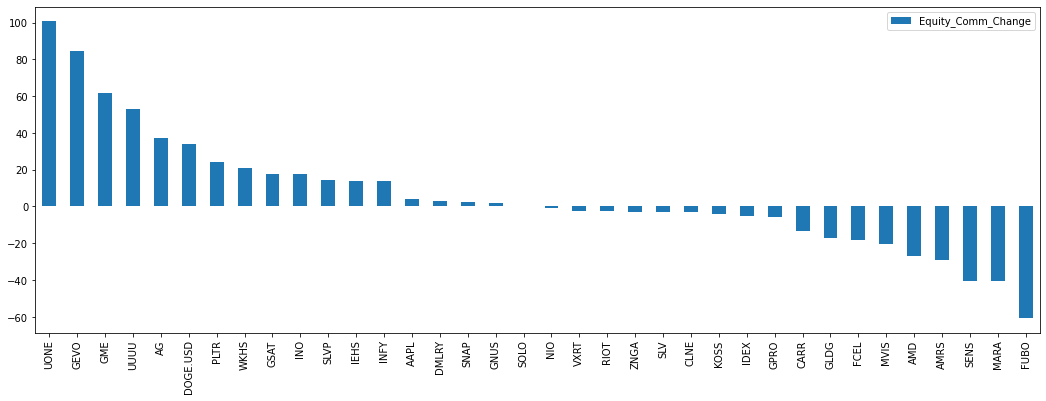

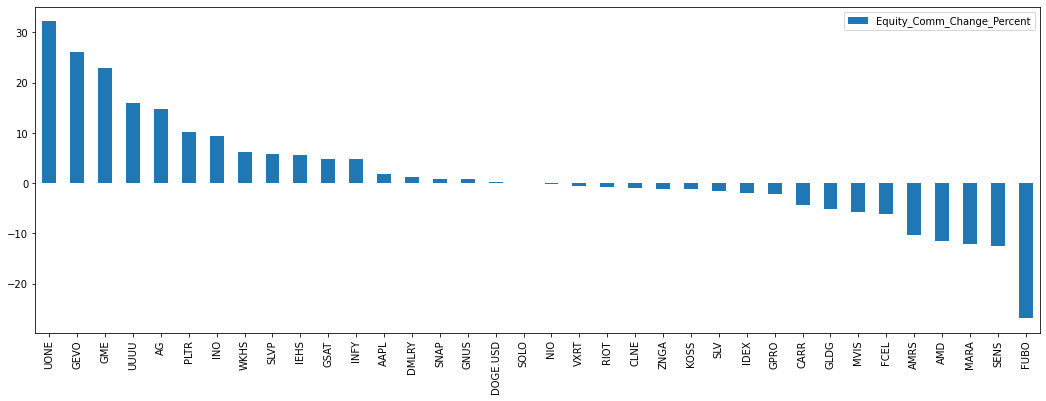

In [16]:
if len(ticker_list)>0:
    equity_change={}
    total_port_equity_change=0
    for i in range(len(ticker_list)):
        stock=ticker_list[i]
        if stock in df_equity.columns.tolist() and stock in df_suggested_equity.index.tolist():
            equity_change[stock]=df_equity.loc['Equity',stock]-df_suggested_equity[stock]
            total_port_equity_change=total_port_equity_change+equity_change[stock]

    equity_change_percent=total_port_equity_change/total_port_equity*100
    df_equity_change=pd.DataFrame.from_dict(data=equity_change,orient='index',columns=['Equity_Change']).transpose()
    df_equity_change_ratio=pd.DataFrame(df_equity_change.
                                 div(df_suggested_equity))
    df_equity_change_percent=df_equity_change_ratio*100
    df_equity_change_ratio.rename(index={'Equity_Change':'Equity_Change_Ratio'},inplace=True)
    df_equity_change_percent.rename(index={'Equity_Change':'Equity_Change_Percent'},inplace=True)

    if len(comm_stocks)>0:
        equity_comm_change={}
        equity_comm_change_percent={}
        total_equity_comm_change=0
        for i in range(len(comm_stocks)):
            comm_stock=comm_stocks[i]
            if comm_stock in list(stocks_dict.keys()):
                equity_comm_change[comm_stock]=float(stocks_dict[comm_stock]['equity_change'])
                equity_comm_change_percent[comm_stock]=float(stocks_dict[comm_stock]['percent_change'])
            else:
                equity_comm_change[comm_stock]=df_equity.loc['Equity',comm_stock]-df_suggested_equity[comm_stock]
                equity_comm_change_percent[comm_stock]=equity_comm_change[comm_stock]/100
            total_equity_comm_change=total_equity_comm_change+equity_comm_change[comm_stock]
        print('Total Common equity change value is: {}'.format(total_equity_comm_change))


        total_equity_comm_change_percent=total_equity_comm_change/total_port_equity*100
        print('Total Common Change Percent is: {}'.format(total_equity_comm_change_percent))

        df_equity_comm_change=pd.DataFrame.from_dict(data=equity_comm_change,orient='index',columns=['Equity_Comm_Change']).transpose()
        df_equity_comm_change_percent=pd.DataFrame.from_dict(data=equity_comm_change_percent,orient='index',columns=['Equity_Comm_Change_Percent']).transpose()
        # df_equity_comm_change_ratio=pd.DataFrame(df_equity_comm_change.
        #                                  div(df_suggested_equity))
        # df_equity_comm_change_percent=df_equity_comm_change_ratio*100
        # df_equity_comm_change_ratio.rename(index={'Equity_Comm_Change':'Equity_Comm_Change_Ratio'},inplace=True)
        # df_equity_comm_change_percent.rename(index={'Equity_Comm_Change':'Equity_Comm_Change_Percent'},inplace=True)
        ############################ Plots #####################################
        df_equity_comm_change.sort_values(by='Equity_Comm_Change',axis=1,ascending=False).transpose().plot(kind='bar',figsize=(18,6));
        print(df_equity_comm_change.sort_values(by='Equity_Comm_Change',axis=1,ascending=False))
        df_equity_comm_change_percent.sort_values(by='Equity_Comm_Change_Percent',axis=1,ascending=False).transpose().plot(kind='bar',figsize=(18,6));
    else:
        print('no common stocks')

else:
    print('no positions')

## Update Stop Loss

### Stop Loss Sell Limit Price

### Cancel Existing Stock Orders

### Update Stop Loss Sell orders for all stocks

## Sell and Buy Stocks

### Sell all portfolio stocks

### Sell all stocks

### Buy Portfolio Stocks

#### 